## Introduction

This codebook was created in Winter/Spring 2023 by Tierra Abeyta as part of a placement project with [Southampton Digital Humanities](http://digitalhumanities.soton.ac.uk/) for [ARCH6413 Professional Placement in the Archaeological and Cultural Heritage Sector](https://www.southampton.ac.uk/courses/modules/arch6413).

Code in this repo is released under a [MIT License](https://mit-license.org/) license (exceptions: third party data, embeds to and from external sources).

The codebook was written in Jupyter Notebook using the programming language Python, both of are available via [Anaconda](https://www.anaconda.com/download/).

I was inspired to make this sonification by the tutorial "[Sonification with Python - How to Turn Data Into Music w Matt Russo](https://www.youtube.com/watch?v=DUdLRy8i9qI)" and his [codebook](https://bit.ly/3KZYXdU).

Much of this code is then derived from Russo's guide. However, there are some areas where I have added, changed, or commented in greater detail in order to solve errors I ran into and to explain things I found confusing. Overall, the goal is to make approach guide even more accessible to non-coders.

In his tutorial, Russo explains important considerations to keep in mind when sonifying data. I also go over several important
consideration according to current research and literature surrounding sonification.

## Setup

This codebook creates sonifications from tabular data in a .csv format. The output is a sonfication in MIDI format.

Before running any code, create a folder on your computer for your sonification work. Close this notebook and move it into that folder. Also put your data in the same folder.

Note that I was confused by this part at the beginning of the video because Russo already has a notebook, and opens his files using the computer terminal. It might be easier to get started as described above.

In [1]:
#I've added this extra step at the beginning because it was the only way
#I could make sure I was working in the correct directory (collection of files).
#Your notebook and files need to be in the same directory or otherwise you might get
#the error: `FileNotFoundError: [Errno 2] No such file or directory`

#To prevent this, try:

import os #os is a python module that helps with directories, including identifying and changing them
os.getcwd( ) #this prints the directory you're working in

#if the printed directory is not where your files are, use:
#os.chdir(r'desired-directory-path-here') 

#use os.getcwd( ) to make sure you now have the right directory

'C:\\Users\\tabey\\sonif-spacejunk'

## Load Data

In [2]:
#The data I'm using is the cumulative number of space debris objects in orbit since 1958

import pandas as pd #pandas is a python package for handling data. Importing it as pd just shortens it.
import numpy as np  #numpy is a python package for performing computations, for example on arrays 

filename = 'orbityearz' #this is the name of the .csv file

df = pd.read_csv(filename + '.csv')  #load data as a pandas dataframe

#the following can be used to sort your data; you would replace 'age' with the data column you want to use to sort
df = df.sort_values(by=['YEAR'], ascending=True) #sort data (optional, doesn't affect the sonification)
#ascending=False will sort data from oldest to youngest; ascending=True will sort data from youngest to oldest

n_years = len(df)
print (n_years, 'years')

#df.head() #show first 5 rows  -  #
df.tail() #shows last 5 rows

66 years


,YEAR,COUNT,TOTAL
61,2019,408,20338
62,2020,1150,21488
63,2021,1754,23242
64,2022,3055,26297
65,2023,716,27013


## Plot Data

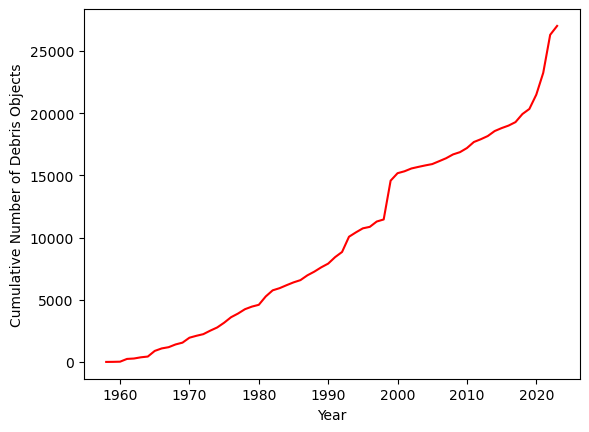

In [3]:
import matplotlib.pylab as plt  #matplotlib.pylab is a python library for plotting

year = df['YEAR'].values    #these make a numpy array (not a list) that you can do operations on (will be useful)
objects = df['TOTAL'].values
times_yrs = year - min(year) #Russo's data measures years AGO, with time running backwards.
                             #Because my data runs forward in time, I altered his original code (times_yrs = max(Years) - Years)

plt.plot(year, objects, c='red') #year is the x-axis, objects is the y-axis, and c= just sets the colour
                                 #you can easily find plot customisations online!
#could also try scatter plot: #plt.scatter(year, objects, c='red', s=objects/300)
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Debris Objects')
#plt.show()
plt.savefig('cum-num-debo.png')

In [4]:
# if your data requires your time/x-axis to be going in reverse (i.e. instead of a timeline from 1960 to 2023 like mine, you
# have data that is YEARS AGO or YEARS SINCE etc., do the following:

#times_yrs = max(year) - year   #the opposite of this is times_yrs = year - min(year)

#plt.plot(times_yrs, objects, c='red')
#plt.xlabel('Years Since First Debris in 1958')
#plt.ylabel('Cumulative Number of Debris Objects')
#plt.show()

In [5]:
#general mapping function

def map_value(value, min_value, max_value, min_result, max_result):   #maps values from one range to another

    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

#Russo says it's not necessary to completedly understand the function, but here are some things to note:
#   value is any value from your data
#   min_value is the smallest value in your data range
#   max_value is the largest value in your data range
#   min_result is the new minimum value you want to map your original minimum value to
#   max_result is the same as min_result but with max values!

## Compress time (choose one)

In [6]:
#Option 1: set a conversion factor to compress time


yrs_per_beat = 1  #number of yrs for each beat of music 

t_data = times_yrs/yrs_per_beat #rescale time from yrs to beats

#printing t_data will show the total beats

duration_beats = max(t_data)  #duration in beats (when last note starts)
print('Duration:', duration_beats, 'beats')
t_data

Duration: 65.0 beats


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65.])

In [7]:
#Option 2: set a desired duration (in beats)

duration_beats = 65 #desired duration in beats (when last note starts)

t_data = map_value(times_yrs, 0, max(times_yrs), 0, duration_beats)

#or
#t_data = map_value(year, min(year), max(year), duration_beats, 0)

yrs_per_beat = max(times_yrs)/duration_beats #to show years per beat
print('yrs per beat:', yrs_per_beat)
t_data

yrs per beat: 1.0


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65.])

Duration: 65.0 seconds


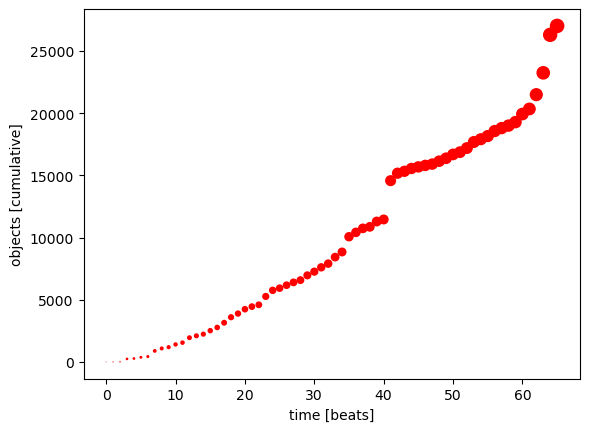

In [8]:
#compress time - option 2 cont.: calculate duration (in seconds)

#calculate duration in seconds
bpm = 60  #if bpm = 60, 1 beat = 1 sec 
duration_sec = duration_beats*60/bpm #duration in seconds (when last note starts)
print('Duration:', duration_sec, 'seconds')

plt.scatter(t_data, objects, c='red', s=objects/300)
plt.xlabel('time [beats]')
plt.ylabel('objects [cumulative]')
plt.show()

## Normalise and Scale Data

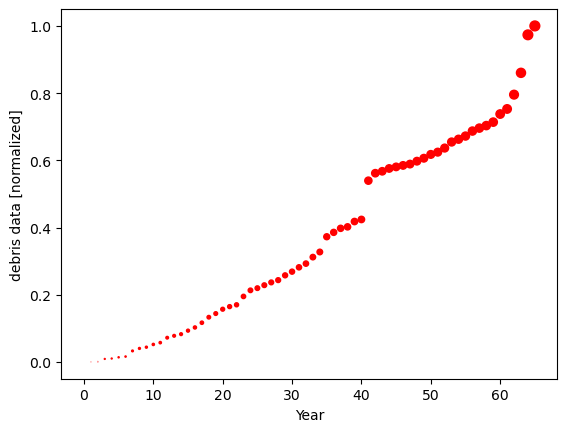

In [9]:
#y-axis = Total, x-axis = Years

#normalsing data scalees it so that it goes from 0 to 1 (i.e. instead of 0 to 27013)
#this is done using the mapping function we made

y_data = map_value(objects, min(objects), max(objects), 0, 1)


plt.scatter(times_yrs, y_data, s=50*y_data, c='red')
plt.xlabel('Year')
plt.ylabel('debris data [normalized]')
plt.show()

#normalising data gives you more control over the scaling of the data

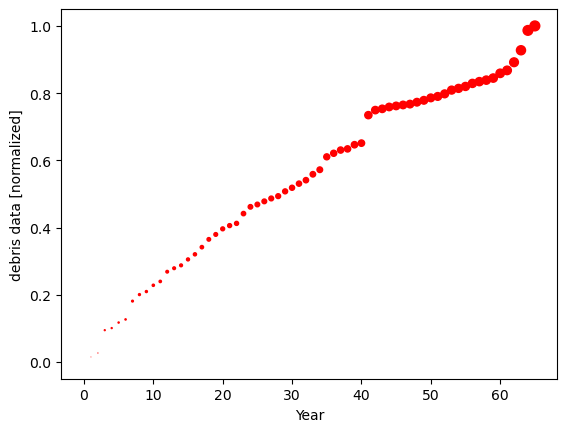

In [10]:
y_data = map_value(objects, min(objects), max(objects), 0, 1)
y_scale = 0.5  #lower than 1 to spread data points out more evenly

scaled_data = y_data**y_scale

plt.scatter(times_yrs, scaled_data, s=50*y_data, c='red')
plt.xlabel('Year')
plt.ylabel('debris data [normalized]')
plt.show()

## Sonify Data

In [11]:
from audiolazy import str2midi #str2midi is the function to convert note names to midi numbers

#choose notes to map data to:

#example scales:
#4 octaves of major scale
#note_names = ['C2','D2','E2','F2','G2','A2','B2',
#             'C3','D3','E3','F3','G3','A3','B3',
#             'C4','D4','E4','F4','G4','A4','B4',
#             'C5','D5','E5','F5','G5','A5','B5']

#4 octaves of major pentatonic scale 
#note_names = ['C2','D2','E2','G2','A2',
#             'C3','D3','E3','G3','A3',
#             'C4','D4','E4','G4','A4',
#             'C5','D5','E5','G5','A5']

#custom note set (I chose the C double harmonic scale because of it's ominous feeling; I do this to (hopefully) reflect the 
#ominous feeling I associate with the increased obscurity surrounding us due to the rise in orbiting space debris.)
note_names = ['C1','C#1','E1', 'F1', 'G1', 'G#1', 'B1',
              'C2','C#2','E2', 'F2', 'G2', 'G#2', 'B2',
              'C3','C#3','E3', 'F3', 'G3', 'G#3', 'B3',
              'C4','C#4','E4', 'F4', 'G4', 'G#4', 'B4']


note_midis = [str2midi(n) for n in note_names] #this says for every note (n) in the list (note_names), run function str2midi(n)
                                               #to get the corresponding midi number and add it to the new list (note_midis)

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')
note_midis

Resolution: 28 notes


[24,
 25,
 28,
 29,
 31,
 32,
 35,
 36,
 37,
 40,
 41,
 43,
 44,
 47,
 48,
 49,
 52,
 53,
 55,
 56,
 59,
 60,
 61,
 64,
 65,
 67,
 68,
 71]

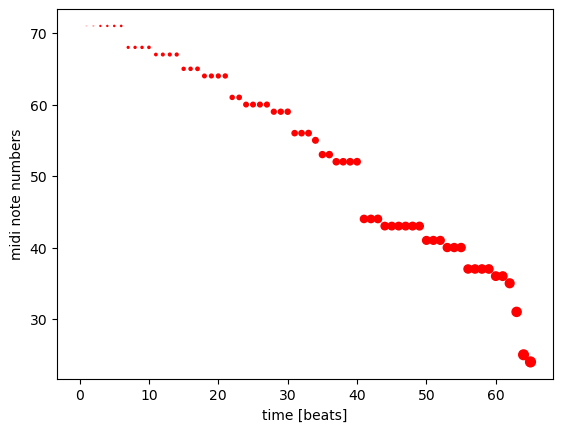

In [12]:
#Map data to MIDI note numbers (map larger amounta of debris to lower notes)

midi_data = []
for i in range(n_years):
    
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: more debris = mapped to lower notes
                                                         #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data, c='red')
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

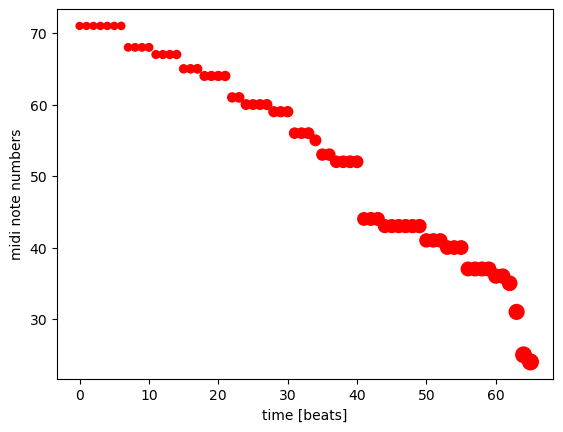

In [13]:
#Map data to note velocities (map larger craters to greater velocities) Velocity = volume + intensity

vel_min, vel_max = 25, 127   #minimum and maximum note velocity
                            #Anything lower than 35 will be more difficult to hear
vel_data = []
for i in range(n_years):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #more debris will be louder
                                                                #we round here because note velocites are integers
    vel_data.append(note_velocity)

plt.scatter(t_data, midi_data, s=vel_data, c='red')
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [17]:
#I was confused by the way Russo customised the actual MIDI notes
# (instrument, bpm, duration, etc.) so I took a slightly different approach.
bpm = 132
instrument = 10  #music box; because python counts from 0, you need to select the number below your chosen instrument
duration = 1     #ex: music box is 11, so I select 10

## Export Sonification

In [18]:
#save data as MIDI file

from midiutil import MIDIFile #MIDIFile is the library used to make a midi file
    
#create midi file object, add tempo
my_midi_file = MIDIFile(1)
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 


my_midi_file.addProgramChange(0, channel=0, time=0, program=instrument) #I had to add this to be able to change the instrument


#add midi notes
for i in range(n_years):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=duration, volume=vel_data[i])

if os.path.exists(filename+'.mid'):   #I added this so that if I alter the code and generate a new MIDI file, it will replace
    os.remove(filename + '.mid')      #the old MIDI file.

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

## Listen to Sonification

In [19]:
#Listen to MIDI file within jupyter

import pygame #pygame is a python library for handling multimedia (in this case sound)

pygame.init()
pygame.mixer.music.load(filename + '.mid') #this loads the midi file
pygame.mixer.music.play()                  #and this plays it

In [76]:
pygame.mixer.music.stop()